In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score ,roc_curve
from sklearn.svm import SVR
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
train_data = pd.read_csv('D:\\Summer analytic_files\\dataset and all\\training_set_features.csv')
test_data = pd.read_csv('D:\\Summer analytic_files\\dataset and all\\test_set_features.csv')
train_labels = pd.read_csv("D:\\Summer analytic_files\\dataset and all\\training_set_labels.csv")
submission=pd.read_csv("D:\\Summer analytic_files\\dataset and all\\submission_format.csv")

In [3]:
# Missing_values
def filling_missing_values(df):
    for col in df.columns:
        if df[col].dtype=='object':
            df[col].fillna('Unkonwn',inplace=True)
        else:
            df[col].fillna(df[col].mean(),inplace=True)    
    return df        

# Standerdize The Traning Data

In [4]:
# remove the missing_values
df=train_data
new_df=filling_missing_values(df)

In [5]:
new_df.shape

(26707, 36)

In [6]:
# Catogorical data to numerical data
oe=OrdinalEncoder()
new_train_data=oe.fit_transform(new_df)

In [7]:
columns_name=train_data.columns
new_train_data=pd.DataFrame(new_train_data,columns=columns_name)

In [8]:
sc=StandardScaler()
sc.fit(new_train_data)
normalized_arr=sc.transform(new_train_data)
normalized_df=pd.DataFrame(normalized_arr, columns=columns_name)

# Standerdize The Testing Data


In [9]:
test_features_data=filling_missing_values(test_data)
enc = OrdinalEncoder()
enc.fit(test_features_data)
test_features_data_arr=enc.transform(test_features_data)

col_names_list=test_features_data.columns
test_encoded_categorical_df=pd.DataFrame(test_features_data_arr, columns=col_names_list)
test_normalized_arr=sc.transform(test_encoded_categorical_df)
test_normalized_df=pd.DataFrame(test_normalized_arr, columns=col_names_list)

In [10]:
# target_values XYZ_vaccine
y=train_labels.loc[:,'xyz_vaccine']
X=normalized_df

# split the train and test  data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [11]:
cv=StratifiedShuffleSplit(n_splits=5,random_state=42)

# SGD Regressor

In [12]:
from sklearn.linear_model import SGDRegressor
# XYZ_Vaccine
sgd=SGDRegressor()

parameters={
       'alpha':[0.0001,0.001,0.01,0.1,1],
       'max_iter':[10,100,1000],
       'learning_rate':['invscaling','optimal','adaptive']
}

grid=GridSearchCV(estimator=sgd,param_grid=parameters,cv=cv,n_jobs=-1)
grid.fit(X_train,y_train)

print("best Estimator",grid.best_estimator_)
print('best Perameters',grid.best_params_)

y_pred=grid.predict(X_test)

# submission['XYZ_Vacine_pred']=y_pred
results=roc_auc_score(y_test,y_pred)
print(results)

best Estimator SGDRegressor(alpha=0.01, learning_rate='adaptive')
best Perameters {'alpha': 0.01, 'learning_rate': 'adaptive', 'max_iter': 1000}
0.8461523754296615


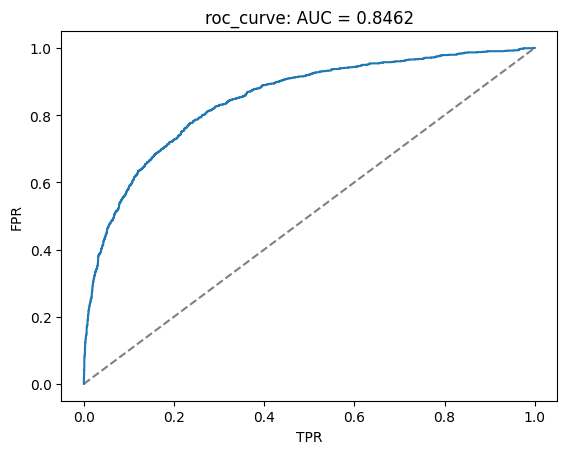

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.plot(fpr,tpr)
plt.title(f"{'roc_curve'}: AUC = {roc_auc_score(y_test, y_pred):.4f}")
plt.show()

In [37]:
submission['h1n1_vaccine']=grid.predict(test_normalized_df)
submission['h1n1_vaccine'] = np.where(submission['h1n1_vaccine'] < 0, 0.0, submission['h1n1_vaccine'])

# Step 4: Save the updated DataFrame back to a CSV file
submission.to_csv('D:\Summer analytic_files\dataset and all\submission_format(SGD).csv', index=False)

In [29]:
# For Seasional FLu
# target_values XYZ_vaccine
y=train_labels.loc[:,'seasonal_vaccine']
X=normalized_df

# split the train and test  data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
sgd=SGDRegressor()

parameters={
       'alpha':[0.0001,0.001,0.01,0.1,1],
       'max_iter':[10,100,1000],
       'learning_rate':['invscaling','optimal','adaptive']
}

grid=GridSearchCV(estimator=sgd,param_grid=parameters,cv=cv,n_jobs=-1)
grid.fit(X_train,y_train)

print("best Estimator",grid.best_estimator_)
print('best Perameters',grid.best_params_)

y_pred=grid.predict(X_test)

results=roc_auc_score(y_test,y_pred)
print(results)


best Estimator SGDRegressor(alpha=0.01, learning_rate='adaptive', max_iter=100)
best Perameters {'alpha': 0.01, 'learning_rate': 'adaptive', 'max_iter': 100}
0.8539998286724186


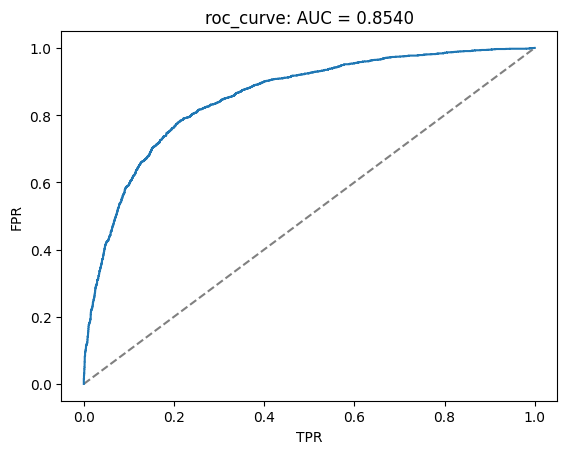

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.plot(fpr,tpr)
plt.title(f"{'roc_curve'}: AUC = {roc_auc_score(y_test, y_pred):.4f}")
plt.show()

In [38]:
submission['seasonal_vaccine']=grid.predict(test_normalized_df)
submission['seasonal_vaccine'] = np.where(submission['seasonal_vaccine'] < 0, 0.0, submission['seasonal_vaccine'])
# Step 4: Save the updated DataFrame back to a CSV file
submission.to_csv('D:\Summer analytic_files\dataset and all\submission_format(SGD).csv', index=False)